## Классификационное дерево  
[Теория sklearn](https://scikit-learn.org/stable/modules/tree.html)

In [23]:
# Блок с используемыми библиотеками
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.metrics import classification_report 
from pandas import DataFrame

In [24]:
iris = datasets.load_iris()
df = DataFrame(iris.data, columns=iris.feature_names)
df['Species'] = iris.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   Species            150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


In [26]:
df.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
Species              0
dtype: int64

In [27]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
sepal length (cm),150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
sepal width (cm),150.0,3.057333,0.435866,2.0,2.8,3.00,3.3,4.4
petal length (cm),150.0,3.758000,1.765298,1.0,1.6,4.35,5.1,6.9
petal width (cm),150.0,1.199333,0.762238,0.1,0.3,1.30,1.8,2.5
Species,150.0,1.000000,0.819232,0.0,0.0,1.00,2.0,2.0


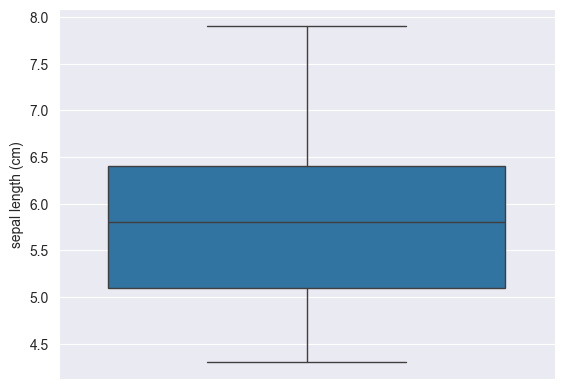

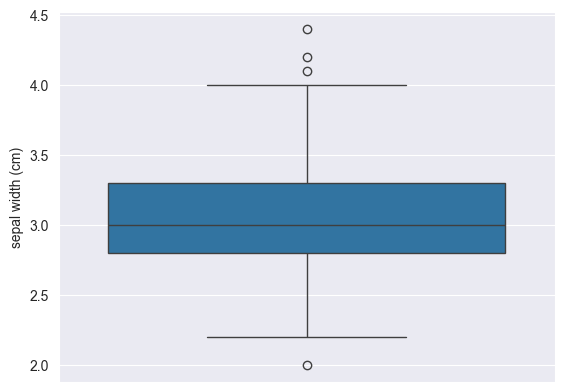

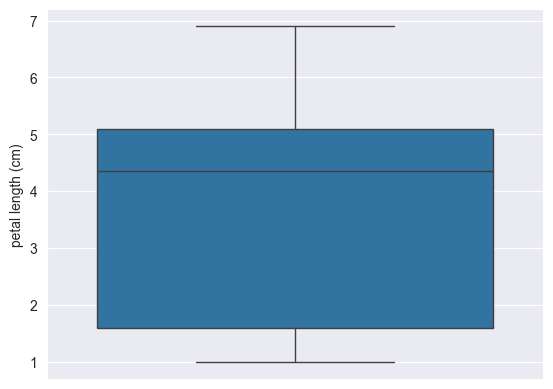

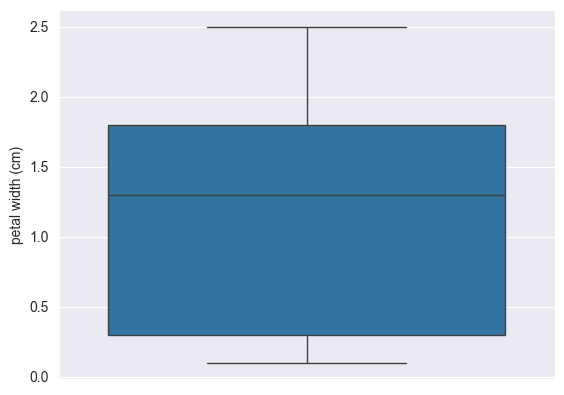

In [28]:
cols = df.columns[0:-1]
for i in cols:
    sns.boxplot(y=df[i])
    plt.show()

In [29]:
q1 = df['sepal width (cm)'].quantile(0.25)
q3 = df['sepal width (cm)'].quantile(0.75)
iqr = q3 - q1
df = df[(df['sepal width (cm)'] >= q1-1.5*iqr) & (df['sepal width (cm)'] <= q3+1.5*iqr)]
df.shape

(146, 5)

In [30]:
q1 = df['sepal width (cm)'].quantile(0.25)
q3 = df['sepal width (cm)'].quantile(0.75)
iqr = q3 - q1
df = df[(df['sepal width (cm)'] >= q1-1.5*iqr) & (df['sepal width (cm)'] <= q3+1.5*iqr)]
df.shape

(146, 5)

In [31]:
X = df.drop("Species",axis=1)
y = df["Species"]
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3, random_state= 1)

In [32]:
dt = DecisionTreeClassifier(max_depth=3, min_samples_leaf=10, random_state=1 )
dt.fit(X, y)

DecisionTreeClassifier(max_depth=3, min_samples_leaf=10, random_state=1)

In [33]:

dt = DecisionTreeClassifier(random_state=1)
dt.fit(X_train, y_train)

y_pred_train = dt.predict(X_train)
y_pred = dt.predict(X_test)
y_prob = dt.predict_proba(X_test)

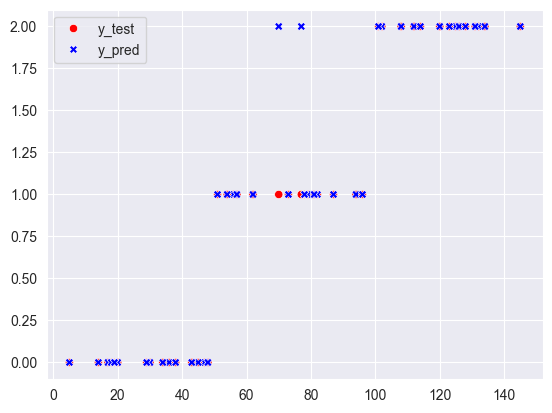

In [34]:
sns.scatterplot(
    data=DataFrame({'y_test': y_test, 'y_pred': y_pred}),
    palette={'y_pred': 'blue', 'y_test': 'red'}
)
plt.show()

In [35]:
print('Accuracy of Decision Tree-Train: ', accuracy_score(y_pred_train, y_train))
print('Accuracy of Decision Tree-Test: ', accuracy_score(y_pred, y_test))

Accuracy of Decision Tree-Train:  1.0
Accuracy of Decision Tree-Test:  0.9545454545454546


In [36]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      0.87      0.93        15
           2       0.88      1.00      0.93        14

    accuracy                           0.95        44
   macro avg       0.96      0.96      0.95        44
weighted avg       0.96      0.95      0.95        44


[Text(0.4, 0.9166666666666666, 'x[3] <= 0.75\nsamples = 102\nvalue = [32, 34, 36]'),
 Text(0.2, 0.75, 'samples = 32\nvalue = [32, 0, 0]'),
 Text(0.6, 0.75, 'x[3] <= 1.65\nsamples = 70\nvalue = [0, 34, 36]'),
 Text(0.4, 0.5833333333333334, 'x[2] <= 4.95\nsamples = 37\nvalue = [0, 34, 3]'),
 Text(0.2, 0.4166666666666667, 'samples = 33\nvalue = [0, 33, 0]'),
 Text(0.6, 0.4166666666666667, 'x[0] <= 6.15\nsamples = 4\nvalue = [0, 1, 3]'),
 Text(0.4, 0.25, 'x[3] <= 1.55\nsamples = 2\nvalue = [0, 1, 1]'),
 Text(0.2, 0.08333333333333333, 'samples = 1\nvalue = [0, 0, 1]'),
 Text(0.6, 0.08333333333333333, 'samples = 1\nvalue = [0, 1, 0]'),
 Text(0.8, 0.25, 'samples = 2\nvalue = [0, 0, 2]'),
 Text(0.8, 0.5833333333333334, 'samples = 33\nvalue = [0, 0, 33]')]

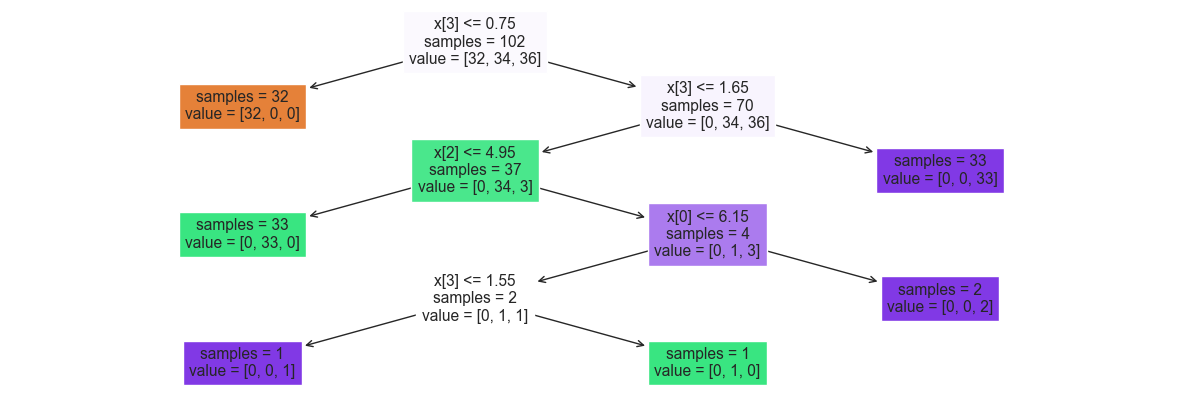

In [37]:
plt.figure(figsize=(15,5))
plot_tree(dt, filled=True, impurity=False) 